In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_patient_data.csv")
print(df)

     encounter_id  patient_nbr             race  gender       age  \
0           12522     48330783        Caucasian  Female   [80-90)   
1           15738     63555939        Caucasian  Female  [90-100)   
2           16680     42519267        Caucasian    Male   [40-50)   
3           28236     89869032  AfricanAmerican  Female   [40-50)   
4           35754     82637451        Caucasian    Male   [50-60)   
..            ...          ...              ...     ...       ...   
995       7609632      4768929                ?    Male   [70-80)   
996       7623816     60201873        Caucasian    Male   [50-60)   
997       7637220     10171602  AfricanAmerican  Female   [40-50)   
998       7637604      3210228        Caucasian    Male   [80-90)   
999       7638540     16621686                ?  Female   [40-50)   

     admission_type_id  discharge_disposition_id  admission_source_id  \
0                    2                         1                    4   
1                    3   

In [3]:
print(df.info)

<bound method DataFrame.info of      encounter_id  patient_nbr             race  gender       age  \
0           12522     48330783        Caucasian  Female   [80-90)   
1           15738     63555939        Caucasian  Female  [90-100)   
2           16680     42519267        Caucasian    Male   [40-50)   
3           28236     89869032  AfricanAmerican  Female   [40-50)   
4           35754     82637451        Caucasian    Male   [50-60)   
..            ...          ...              ...     ...       ...   
995       7609632      4768929                ?    Male   [70-80)   
996       7623816     60201873        Caucasian    Male   [50-60)   
997       7637220     10171602  AfricanAmerican  Female   [40-50)   
998       7637604      3210228        Caucasian    Male   [80-90)   
999       7638540     16621686                ?  Female   [40-50)   

     admission_type_id  discharge_disposition_id  admission_source_id  \
0                    2                         1                  

In [24]:
print("Duplicates",df.duplicated().sum())
print("Rows:",df.shape[0],"Columns:",df.shape[1])
print(df.isnull().sum())

Duplicates 0
Rows: 1000 Columns: 48
encounter_id                  0
patient_nbr                   0
race                          0
gender                        0
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                        0
diag_2                        0
diag_3                        0
number_diagnoses              0
max_glu_serum               960
A1Cresult                   811
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolb

In [25]:
# Fill missing categorical lab test results with 'None'
df['max_glu_serum'].fillna('None', inplace=True)
df['A1Cresult'].fillna('None', inplace=True)
df[['max_glu_serum', 'A1Cresult']].isnull().sum()


C:\Users\MyLaptop HP\AppData\Local\Temp\ipykernel_16800\3553802232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_glu_serum'].fillna('None', inplace=True)
C:\Users\MyLaptop HP\AppData\Local\Temp\ipykernel_16800\3553802232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

max_glu_serum    0
A1Cresult        0
dtype: int64

In [26]:
# Count how many "?" symbols appear in each column
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        print(f"{col}: {count} '?' values")
        
df['race'] = df['race'].replace('?', 'unknown')
df['medical_specialty'] = df['medical_specialty'].replace('?', 'unknown')
df['diag_2'] = df['diag_2'].replace('?', 'unknown')
df['diag_3'] = df['diag_3'].replace('?', 'unknown')

(df == '?').any().any()

race: 32 '?' values
medical_specialty: 317 '?' values
diag_2: 10 '?' values
diag_3: 36 '?' values


np.False_

  readmitted  percentage
0         NO        49.1
1        >30        41.5
2        <30         9.4


C:\Users\MyLaptop HP\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


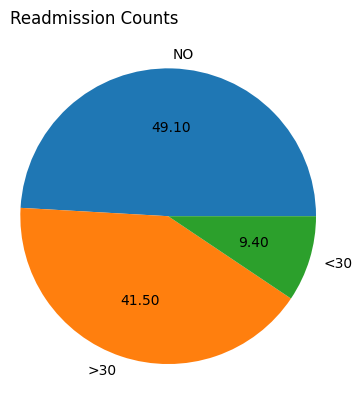

In [27]:
#Explore Data Analysis
#1)Readmission %
readmit_percentage = (df['readmitted'].value_counts(normalize=True).mul(100).rename("percentage").reset_index())
print(readmit_percentage.round(2))
values = readmit_percentage["percentage"]
labels = readmit_percentage["readmitted"]
plt.pie(values,labels = labels,autopct = "%1.2f",data = df)
# plt.title("Readmitted %")
# plt.show()

sns.countplot(x = 'readmitted',data = df, hue = 'readmitted',palette = 'Set2')
plt.title("Readmission Counts")
plt.show()

   gender readmitted  Percentage
0  Female         NO   47.024952
1  Female        >30   42.994242
2  Female        <30    9.980806
3    Male         NO   51.356994
4    Male        >30   39.874739
5    Male        <30    8.768267


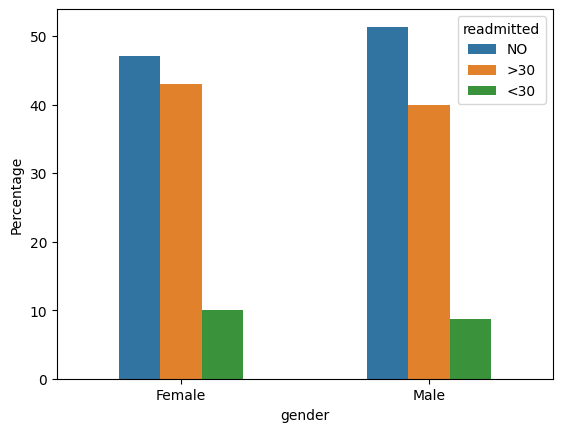

In [28]:
#2)Readmission by Gender
gender_readmit = (df.groupby('gender')['readmitted'].value_counts(normalize = True).mul(100).rename('Percentage').reset_index())
print(gender_readmit)
sns.barplot(data = gender_readmit,x = 'gender',y = 'Percentage',hue = 'readmitted',width = 0.5)
plt.show()

               race readmitted  percentage
0   AfricanAmerican         NO   47.430830
1   AfricanAmerican        >30   43.083004
2   AfricanAmerican        <30    9.486166
3             Asian         NO   66.666667
4             Asian        >30   33.333333
5         Caucasian         NO   48.676471
6         Caucasian        >30   42.205882
7         Caucasian        <30    9.117647
8          Hispanic        >30   50.000000
9          Hispanic        <30   25.000000
10         Hispanic         NO   25.000000
11            Other         NO   71.428571
12            Other        >30   19.047619
13            Other        <30    9.523810
14          unknown         NO   59.375000
15          unknown        >30   28.125000
16          unknown        <30   12.500000


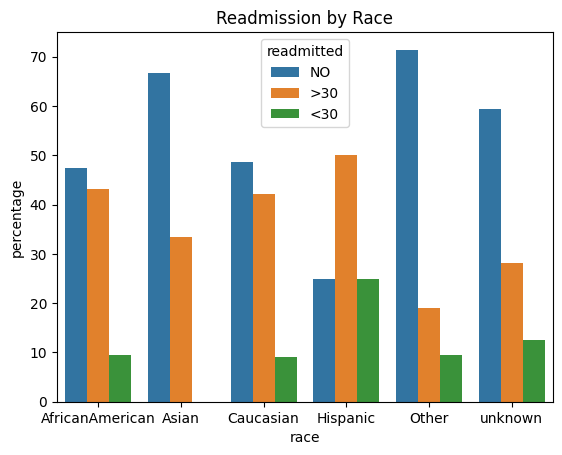

In [29]:
#3)Readmission by Race
race_readmit = df.groupby('race')['readmitted'].value_counts(normalize = True).mul(100).rename("percentage").reset_index()
print(race_readmit)
values = race_readmit['percentage']
labels = race_readmit['race']
sns.barplot(x = 'race',y = 'percentage', hue = 'readmitted',data = race_readmit)
plt.title("Readmission by Race")
plt.show()

         age readmitted  percentage
0     [0-10)         NO   90.909091
1     [0-10)        >30    9.090909
2    [10-20)         NO   60.714286
3    [10-20)        >30   32.142857
4    [10-20)        <30    7.142857
5    [20-30)        >30   46.153846
6    [20-30)         NO   38.461538
7    [20-30)        <30   15.384615
8    [30-40)         NO   54.000000
9    [30-40)        >30   38.000000
10   [30-40)        <30    8.000000
11   [40-50)         NO   47.663551
12   [40-50)        >30   43.925234
13   [40-50)        <30    8.411215
14   [50-60)         NO   48.598131
15   [50-60)        >30   42.523364
16   [50-60)        <30    8.878505
17   [60-70)         NO   50.900901
18   [60-70)        >30   39.189189
19   [60-70)        <30    9.909910
20   [70-80)        >30   46.558704
21   [70-80)         NO   44.534413
22   [70-80)        <30    8.906883
23   [80-90)         NO   51.190476
24   [80-90)        >30   34.523810
25   [80-90)        <30   14.285714
26  [90-100)         NO   54

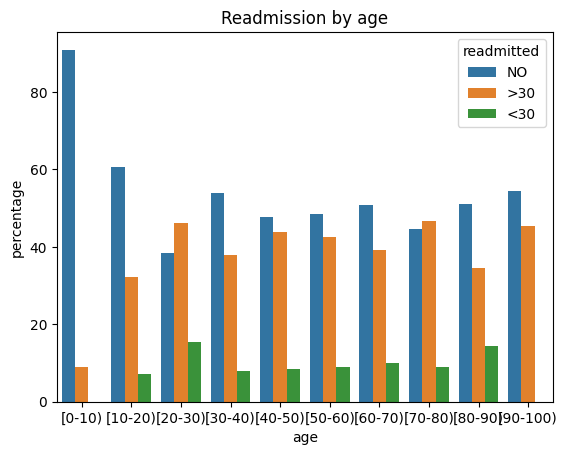

In [30]:
#5)Readmission by Age Group?
age_readmit = df.groupby('age')['readmitted'].value_counts(normalize = True).mul(100).rename("percentage").reset_index()
print(age_readmit)
sns.barplot(x = 'age',y = 'percentage', hue = 'readmitted',data = age_readmit)
plt.title("Readmission by age")
plt.show()

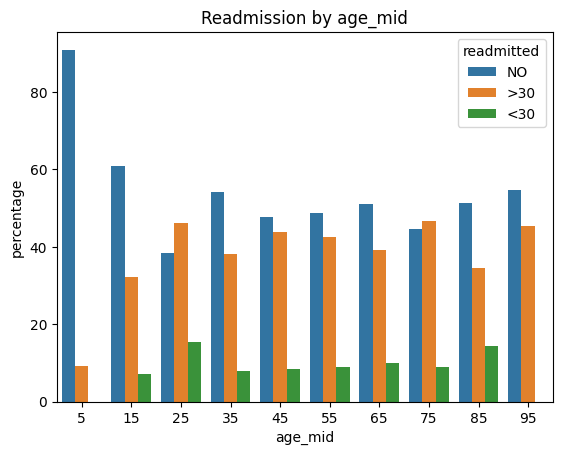

In [32]:
# Map age ranges to mid-points
age_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[50-60)': 55,
   '[40-50)': 45,
   '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

df['age_mid'] = df['age'].map(age_map)

# Map age ranges to mid-points
age_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

df['age_mid'] = df['age'].map(age_map)

age_mid__readmit = (df.groupby('age_mid')['readmitted'].value_counts(normalize = True).mul(100).rename("percentage").reset_index())
sns.barplot(x = 'age_mid',y = 'percentage', hue = 'readmitted',data = age_mid__readmit)
plt.title("Readmission by age_mid")
plt.show()


    time_in_hospital readmitted  Percentage
0                  1         NO   48.275862
1                  1        >30   46.896552
2                  1        <30    4.827586
3                  2         NO   58.169935
4                  2        >30   32.026144
5                  2        <30    9.803922
6                  3         NO   50.295858
7                  3        >30   42.603550
8                  3        <30    7.100592
9                  4         NO   45.238095
10                 4        >30   44.444444
11                 4        <30   10.317460
12                 5        >30   48.314607
13                 5         NO   40.449438
14                 5        <30   11.235955
15                 6        >30   44.000000
16                 6         NO   42.666667
17                 6        <30   13.333333
18                 7         NO   59.677419
19                 7        >30   32.258065
20                 7        <30    8.064516
21                 8         NO 

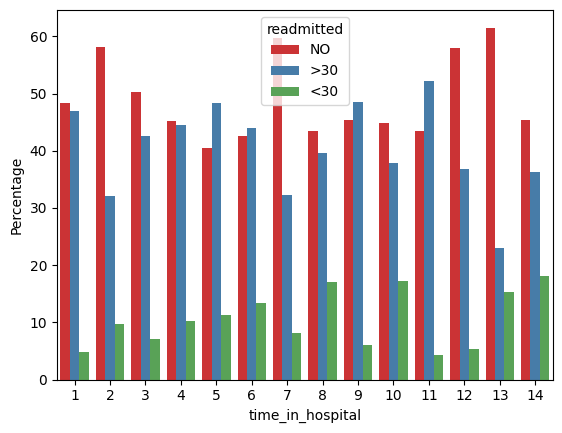

In [33]:
#6)Readmission by time_in_hospital
time_in_hospital_readmit = df.groupby('time_in_hospital')['readmitted'].value_counts(normalize = True).mul(100).rename('Percentage').reset_index()
print(time_in_hospital_readmit)
sns.barplot(data = time_in_hospital_readmit,x = 'time_in_hospital',y = 'Percentage',hue = 'readmitted',palette = 'Set1')
plt.show()


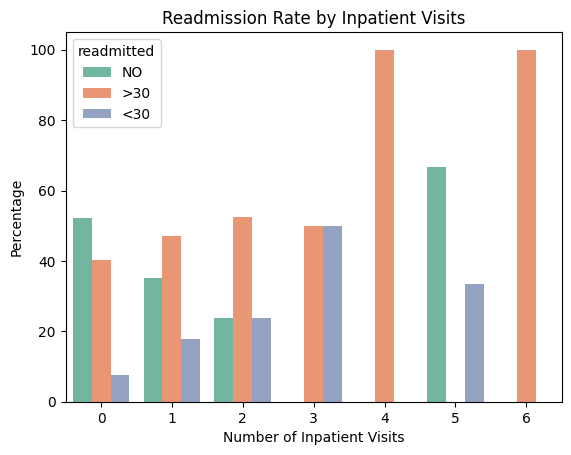

In [34]:
#7) Readmission by number_inpatient
inpatient_readmit = (
    df.groupby('number_inpatient')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

sns.barplot(data=inpatient_readmit, x='number_inpatient', y='Percentage', hue='readmitted', palette='Set2')
plt.title("Readmission Rate by Inpatient Visits")
plt.xlabel("Number of Inpatient Visits")
plt.ylabel("Percentage")
plt.show()


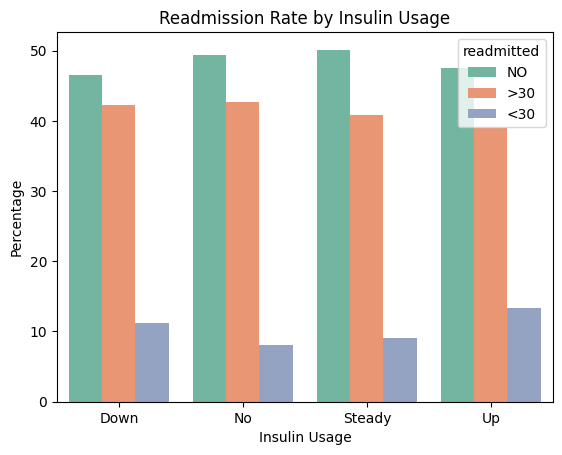

In [35]:
#8)Insulin usage V/S Readmission
insulin_readmit = (
    df.groupby('insulin')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

sns.barplot(data=insulin_readmit, x='insulin', y='Percentage', hue='readmitted', palette='Set2')
plt.title("Readmission Rate by Insulin Usage")
plt.xlabel("Insulin Usage")
plt.ylabel("Percentage")
plt.show()


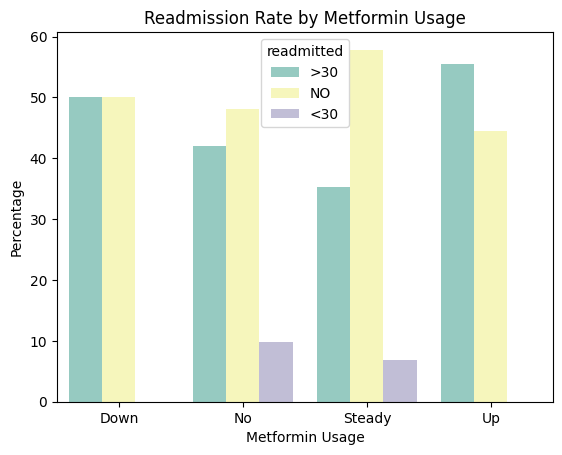

In [36]:
#Readmission by metaform_usage
metformin_readmit = (
    df.groupby('metformin')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

sns.barplot(data=metformin_readmit, x='metformin', y='Percentage', hue='readmitted', palette='Set3')
plt.title("Readmission Rate by Metformin Usage")
plt.xlabel("Metformin Usage")
plt.ylabel("Percentage")
plt.show()


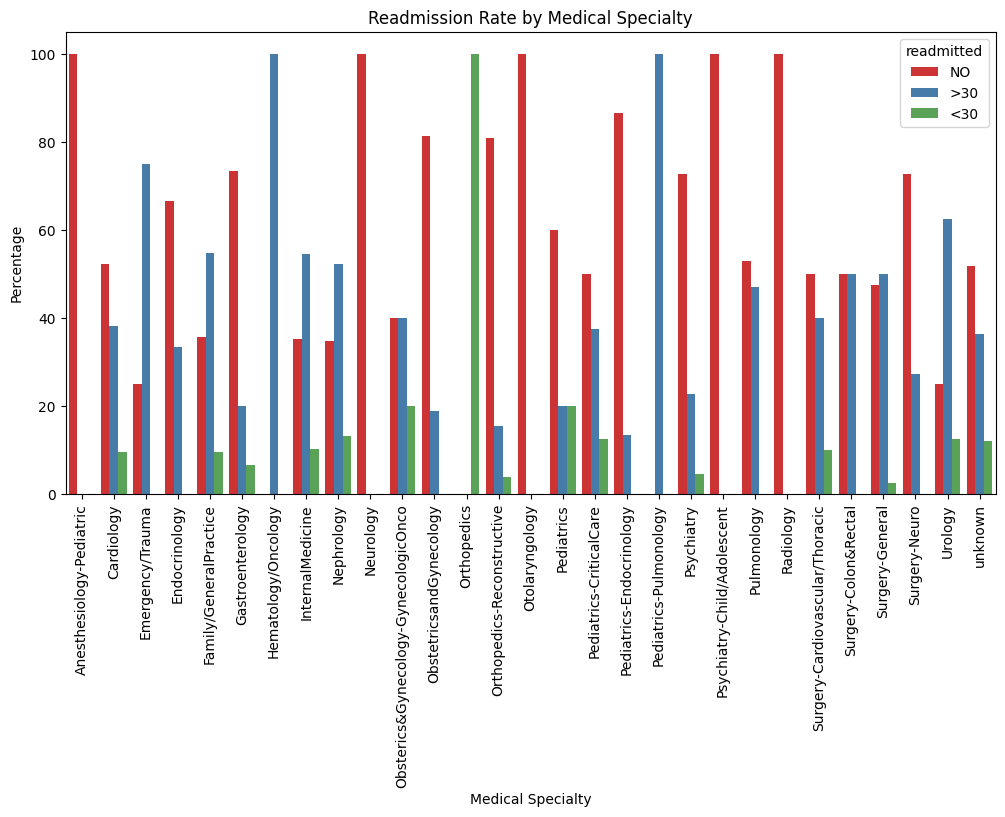

In [37]:
#10)Readmission by Medical_specialty
specialty_readmit = (
    df.groupby('medical_specialty')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=specialty_readmit, x='medical_specialty', y='Percentage', hue='readmitted', palette='Set1')
plt.xticks(rotation=90)
plt.title("Readmission Rate by Medical Specialty")
plt.xlabel("Medical Specialty")
plt.ylabel("Percentage")
plt.show()


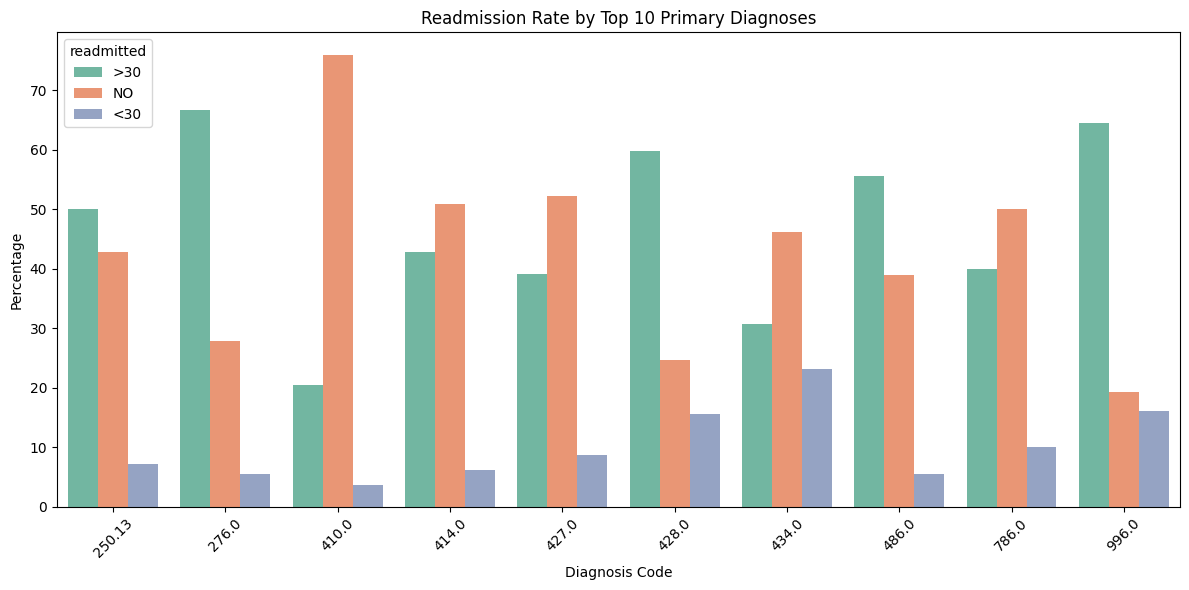

In [38]:
#11)Readmission by diagnosis_group
# Group by diag_1 and readmission, calculate percentage
# STEP 1: Filter top 10 diagnosis codes
top10_diag = (
    df['diag_1'].value_counts()
    .head(10)
    .index.tolist()
)

# STEP 2: Filter dataset to include only those top 10 diagnoses
diag_subset = df[df['diag_1'].isin(top10_diag)]

# STEP 3: Group, calculate percentage readmissions
diag_readmit = (
    diag_subset.groupby('diag_1')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

# STEP 4: Plot
plt.figure(figsize=(12,6))
sns.barplot(data=diag_readmit, x='diag_1', y='Percentage', hue='readmitted', palette='Set2')
plt.title("Readmission Rate by Top 10 Primary Diagnoses")
plt.xlabel("Diagnosis Code")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  change readmitted  Percentage
0     Ch         NO   50.242718
1     Ch        >30   39.563107
2     Ch        <30   10.194175
3     No         NO   48.299320
4     No        >30   42.857143
5     No        <30    8.843537


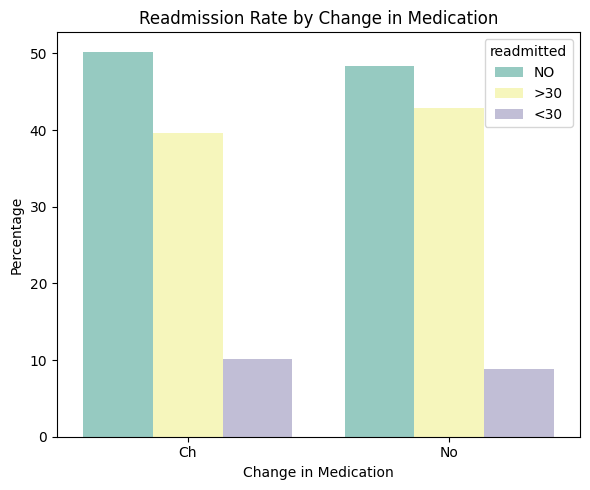

In [18]:
#Readmission rate by change in medication
change_readmit = (
    df.groupby('change')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)
print(change_readmit)

plt.figure(figsize=(6,5))
sns.barplot(data=change_readmit, x='change', y='Percentage', hue='readmitted', palette='Set3')
plt.title("Readmission Rate by Change in Medication")
plt.xlabel("Change in Medication")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()


  diabetesMed readmitted  Percentage
0          No         NO      51.000
1          No        >30      41.500
2          No        <30       7.500
3         Yes         NO      48.625
4         Yes        >30      41.500
5         Yes        <30       9.875


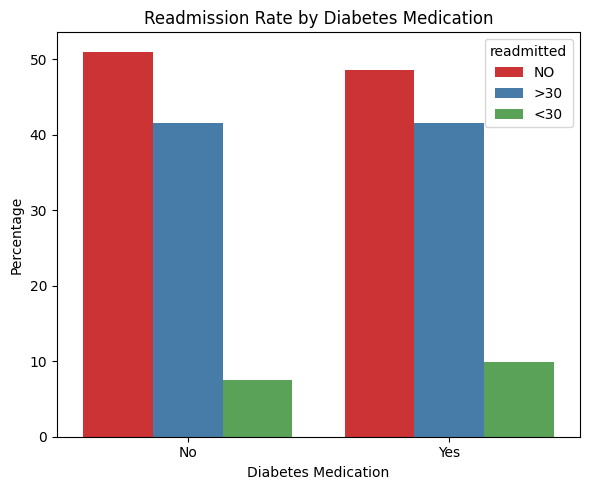

In [19]:
#Readmission rate by Diabeted medication
diabetesMed_readmit = (
    df.groupby('diabetesMed')['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)
print(diabetesMed_readmit)
plt.figure(figsize=(6,5))
sns.barplot(data=diabetesMed_readmit, x='diabetesMed', y='Percentage', hue='readmitted', palette='Set1')
plt.title("Readmission Rate by Diabetes Medication")
plt.xlabel("Diabetes Medication")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()


In [41]:
df.to_csv("deep_cleaned_patient_data.csv",index = False)
df = pd.read_csv("deep_cleaned_patient_data.csv")
print(df)


     encounter_id  patient_nbr             race  gender       age  \
0           12522     48330783        Caucasian  Female   [80-90)   
1           15738     63555939        Caucasian  Female  [90-100)   
2           16680     42519267        Caucasian    Male   [40-50)   
3           28236     89869032  AfricanAmerican  Female   [40-50)   
4           35754     82637451        Caucasian    Male   [50-60)   
..            ...          ...              ...     ...       ...   
995       7609632      4768929          unknown    Male   [70-80)   
996       7623816     60201873        Caucasian    Male   [50-60)   
997       7637220     10171602  AfricanAmerican  Female   [40-50)   
998       7637604      3210228        Caucasian    Male   [80-90)   
999       7638540     16621686          unknown  Female   [40-50)   

     admission_type_id  discharge_disposition_id  admission_source_id  \
0                    2                         1                    4   
1                    3   